In [17]:
# CHECKPOINT = 'spectral-u-net-spectal-first-1575698669.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spectral-max-pool-1576312399.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spectral-mask-1576312649.full.ckpt'
# CHECKPOINT = 'spectral-u-net-mag-only-1576315107.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spectral-naive-normalise-1576384350.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-log-norm-2-1576389592.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-log-norm-mask-2-1576389577.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-log-norm-mask-3-1576393473.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-log-norm-3-1576393411.full.ckpt'
CHECKPOINT = 'spectral-u-net-spec-mel-no-mask-1576563888.full.ckpt'
CHECKPOINT = 'spectral-u-net-spec-longer-1576582373.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-with-more-1x1-1576582951.full.ckpt'
# CHECKPOINT = 'spectral-u-net-mel-spec-smaller-kernel-2-1576583278.full.ckpt'

In [18]:
branch_suffix = '-'.join(CHECKPOINT.replace('spectral-u-net-', '').split('-')[0:-1])
branch = f'train/{branch_suffix}'
print(branch)

train/spec-longer


In [19]:
%%bash -s $branch
cd ../../speech-enhancement
git checkout $1

error: Your local changes to the following files would be overwritten by checkout:
	src/datasets/speech/noisy_speech/speech_dataset_spectral.py
Please commit your changes or stash them before you switch branches.
Aborting


CalledProcessError: Command 'b'cd ../../speech-enhancement\ngit checkout $1\n'' returned non-zero exit status 1.

In [ ]:
import numpy as np
from src.datasets import NoisySpectralSpeechDataset
from src.utils import checkpoint, spectral, notebook

In [20]:
dataset = NoisySpectralSpeechDataset(train=False, quiet=True)

In [21]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()

In [22]:
import numpy as np
from librosa.display import specshow
import matplotlib.pyplot as plt

   
def plot_spec(spec):
    plt.figure(figsize=(10, 4))
    specshow(spec, x_axis='time', y_axis='mel', sr=16000, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [23]:
def reshape_spectrum(arr):
    assert arr.shape == (1, 256, 128), arr.shape
    arr = np.concatenate([arr, np.zeros([2, 1, 128])], axis=1)
    assert arr.shape == (2, 257, 128), arr.shape
    arr = np.concatenate([arr, np.zeros([2, 257, 1])], axis=2)
    assert arr.shape == (2, 257, 129)
    return arr

In [32]:
IDX = 112
noisy_spectral, clean_spectral = dataset[IDX]
noisy_arr = dataset.noisy_data[IDX]
clean_arr = dataset.clean_data[IDX]

In [33]:
noisy_spectral_batch = noisy_spectral.view(1, 1, 256, 128)
pred_clean_spectral_batch = net(noisy_spectral_batch)
pred_clean_spectral = pred_clean_spectral_batch.view(256, 128)

In [34]:
pred_clean_spectral_post = pred_clean_spectral.detach().numpy()
pred_clean_arr = spectral.log_mel_spec_to_audio(pred_clean_spectral_post)

Pred clean signal


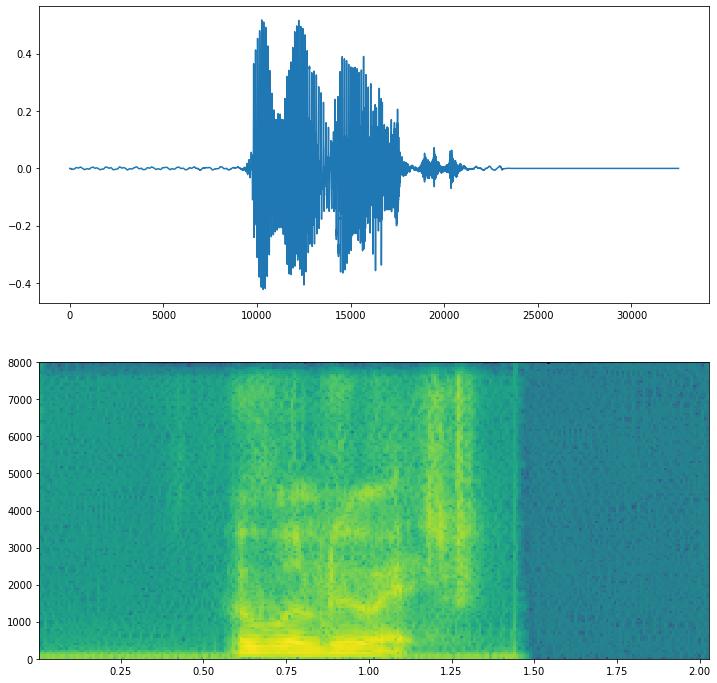

In [35]:
notebook.visualize_audio(pred_clean_arr, 'Pred clean signal')

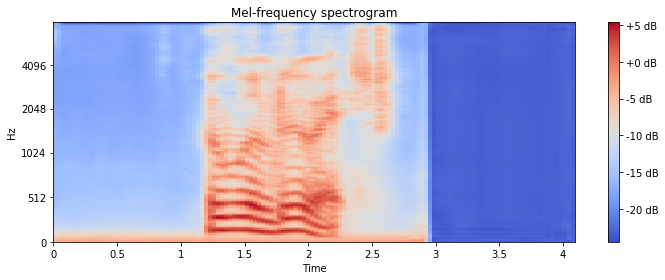

In [36]:
plot_spec(pred_clean_spectral.detach().numpy())

Noisy signal


/home/matt/code/speech/notebooks/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


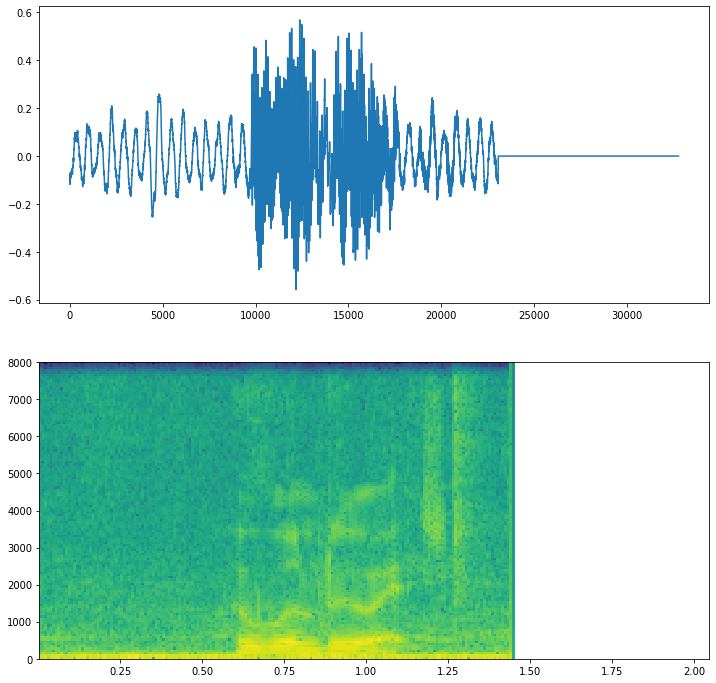

In [37]:
notebook.visualize_audio(dataset.noisy_data[IDX], 'Noisy signal')

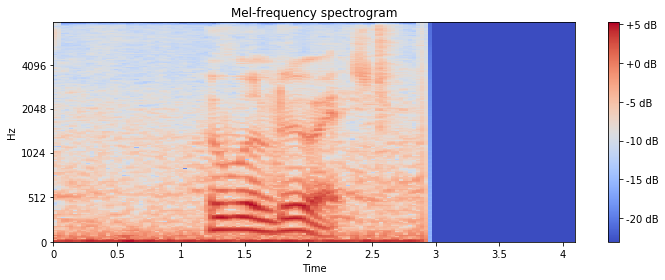

In [38]:
plot_spec(noisy_spectral.view(256,128).detach().numpy())

Clean signal


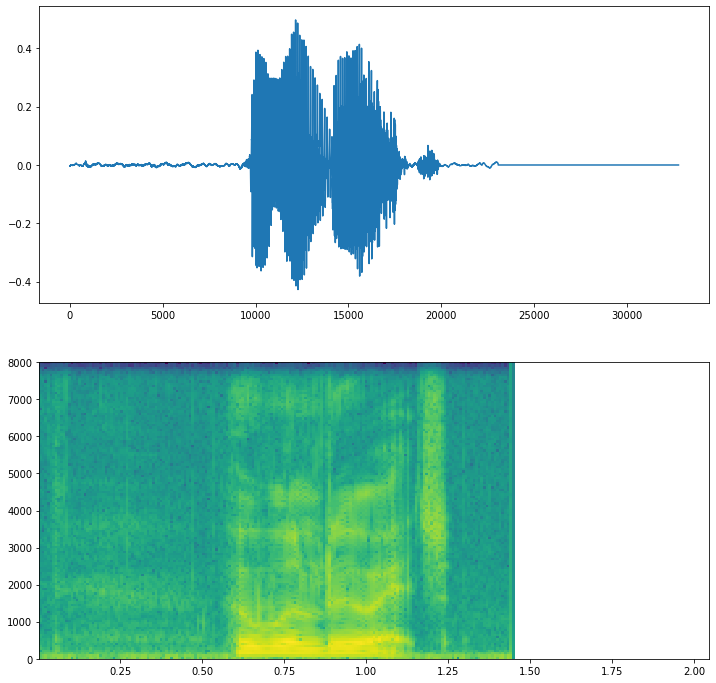

In [39]:
notebook.visualize_audio(dataset.clean_data[IDX], 'Clean signal')